This notebook plays with the algorithm implemented [here](https://github.com/neutronimaging/scripts/blob/master/python/amglib/imageutils.py#L189) by Anders Kaestner.

In [30]:
from scipy import ndimage
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import widgets, interact

# create fake data set 

In [31]:
image_width = 100
image_height = 100
nbr_gammas = 10
nbr_images = 5

In [32]:
list_images = []
for index in np.arange(nbr_images):
    image = np.random.rand(100, 100)
    rand_x = [np.random.randint(image_width) for _ in np.arange(nbr_gammas)]
    rand_y = [np.random.randint(image_height) for _ in np.arange(nbr_gammas)]
    image[rand_y, rand_x] = 10
    list_images.append(image)

<IPython.core.display.Javascript object>


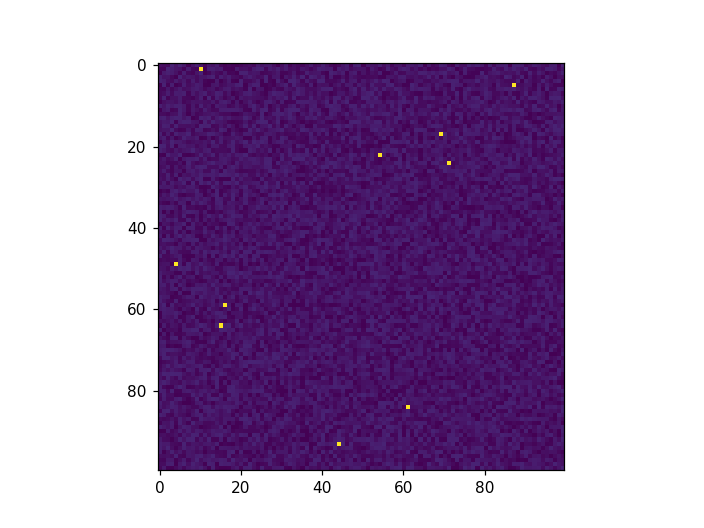

interactive(children=(IntSlider(value=0, description='index', max=4), Output()), _dom_classes=('widget-interac…

In [37]:
fig, ax = plt.subplots(1,1, num="Raw images")

def plot_images(index):
    ax1 = ax.imshow(list_images[index])

plot_ui = interact(plot_images,
                  index = widgets.IntSlider(min=0, max=(nbr_images-1)))

# Algorithm 

In [1]:
def weightedaverageimage(imgs,size) :
    dims=imgs.shape
    w=np.zeros(imgs.shape)
    M=size**2
    print('M=',M)
    fig,ax = plt.subplots(dims[0],4,figsize=(12,30))
    ax = ax.ravel()
    for i in np.arange(dims[0]) :
        print('i=',i)
        f=ndimage.filters.uniform_filter(imgs[i], size=size)*M
        f2=ndimage.filters.uniform_filter(imgs[i]**2, size=size)*M
        
        sigma=(1/(M-1)*(f2-(f**2)/M))**2
        w[i]=1.0/sigma
        ax[i*4].imshow(f)
        ax[i*4+1].imshow(f2)
        ax[i*4+2].imshow(sigma)
        ax[i*4+3].imshow(w[i])

    wsum=w.sum(axis=0)
    for i in np.arange(dims[0]) :
        w[i]=w[i]/wsum

    imgs=w*imgs
    img=imgs.sum(axis=0)
    
    return img